In [1]:
from autoencoders import DenseAutoencoder, limit_memory

In [2]:
limit_memory(gb=6)

In [3]:
import numpy as np
from keras.datasets import mnist


(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))
x_train_noisy = x_train_noisy.reshape(x_train_noisy.shape[0], np.prod(x_train_noisy.shape[1:]))
x_test_noisy = x_test_noisy.reshape(x_test_noisy.shape[0], np.prod(x_test_noisy.shape[1:]))

In [4]:
dense_aut_config = {
    'x_train_in': x_train_noisy,
    'x_train_out': x_train,
    'x_test_in': x_test_noisy,
    'x_test_out': x_test,
    'input_shape': 784,
    'encoding_dim': 20,
    'layers_config': {'encoder_layers': [64, 32],
                      'decoder_layers': [32, 64]}
}

In [5]:
dense_aut = DenseAutoencoder(**dense_aut_config).init_model()
dense_aut.compile()

In [6]:
dense_aut.autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 20)                660       
                                                                 
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 784)               50960 

In [7]:
dense_aut.fit(10, 128)

Epoch 1/10
469/469 [==============================] - 6s 8ms/step - loss: 0.0640 - val_loss: 0.0499
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0443 - val_loss: 0.0388
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0375 - val_loss: 0.0354
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0342 - val_loss: 0.0324
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0320 - val_loss: 0.0310
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0306 - val_loss: 0.0296
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0294 - val_loss: 0.0287
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0283 - val_loss: 0.0276
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0275 - val_loss: 0.0268
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0267 - val_loss: 0.0263

313/313 [==============================] - 1s 3ms/step


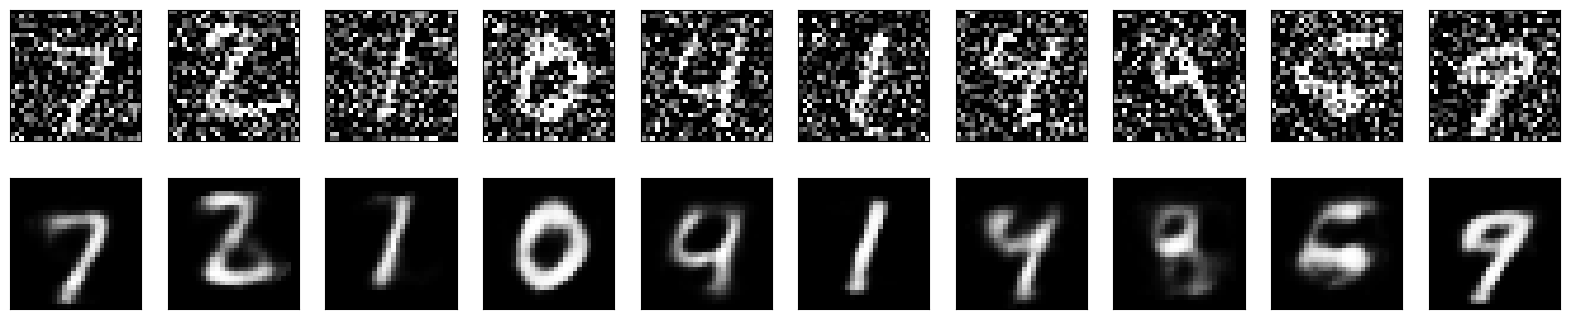

In [8]:
dense_aut.show_examples()

In [9]:
encoder = dense_aut.get_encoder()

In [10]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 20)                660       
                                                                 
Total params: 52,980
Trainable params: 52,980
Non-trainable params: 0
_________________________________________________________________


In [11]:
encoded = encoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [12]:
encoded.shape

(10000, 20)

In [13]:
decoder = dense_aut.get_decoder()

In [14]:
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                672       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 784)               50960     
                                                                 
Total params: 53,744
Trainable params: 53,744
Non-trainable params: 0
_________________________________________________________________


In [15]:
decoded = decoder.predict(encoded)

313/313 [==============================] - 1s 3ms/step


In [16]:
decoded.shape

(10000, 784)

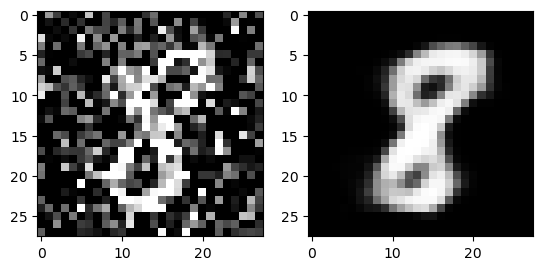

In [17]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2)
axes[0].imshow(x_test_noisy[134].reshape(28, 28))
axes[1].imshow(decoded[134].reshape(28, 28))
plt.show()